# Mikael Ketema, Aurélien Henriques
# Students of 2nd year of Data sciences Master

# SAheart Disease Data Analysis
## Introduction

In this notebook, we're going to analyze the SAheart data. we'll follow the steps below:

1. SAheart Dataset
2. Importation and data preprocessing
3. Classification Models (Decision Tree, Bagging and random forest)
4. Comparison
5. Classification Models (Adaboost, gradient boost, stacking)
6. Conclusion


# 1 SAheart Dataset

This dataset stored a n = 462 sample of males in a heart-disease high-risk region of the Western Cape, South Africa .

## 1.1 Dataset content

The dataset contains the following columns:

- row.names
- sbp	    :	systolic blood pressure
- tobacco	:	cumulative tobacco (kg)
- ldl	:	low densiity lipoprotein cholesterol
- adiposity
- famhist	:	family history of heart disease (Present, Absent)
- typea		:type-A behavior
- obesity
- alcohol	:	current alcohol consumption
- age		: age at onset
- chd	    : response, coronary heart disease

## 1.2 Aim of the Work

Study all types of classification models to be able to predict the value of the “chd” response variable (coronary heart disease) given the other variables  (p = 9).





# 2 Importation and data preprocessing

In [1]:
import random as rd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import (train_test_split, KFold,StratifiedKFold, LeaveOneOut, LeavePOut, cross_val_score)

In [78]:
#Visualization of the data set

# data loading
tab = pd.read_csv(r'SAheart.txt')
np.shape(tab)

# Display all DataFrame lines
pd.set_option('display.max_rows', None)

# Display DataFrame with all rows
#print(tab.to_string())


In [4]:
# general information about the data frame
tab.info()

print('possible values in famhist column:', tab['famhist'].unique()) #the famhist column has two possible values : absent or present which is a binry choice.
print('unique_value for each variables',tab.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB
possible values in famhist column: ['Present' 'Absent']
unique_value for each variables row.names    462
sbp           62
tobacco      214
ldl          329
adiposity    408
famhist        2
typea         54
obesity      400
alcohol      249
age           49
chd            2
dtype: int64


We observe that no line of data has null value, which means that we won't have to replace them and we have a pretty clean dataset. It's also worth noting that famhist column has an 'object' type, meaning that we will have to convert it to use it in the training.

We can see that all but famhist and chd values have hundreds of values, meaning that they could be considered as continuous distribution, whereas they are binary for chd and famhist. The problem will thus be a two-labels classification task.

In [5]:
# Encoding Famhist-Object variable into binary

Code={'Present':1, 'Absent':0} # we select arbitrarly the 1 and 0 for each feature

for col in tab.select_dtypes('object'): # changing all Present/absent values into 0/1
    tab[col]=tab[col].map(Code)

#print(tab['famhist'])

## 2.1 Description of Data

In [6]:
tab=tab.drop('row.names',axis=1) #droping uninformative variable in data

In [7]:
# Display DataFrame descriptive statistics
tab.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


We can see the distribution of data for each variables: The different variables are from different ranges of values from unity to hundreds. None of them have negative values, nor outliers in the min/max.

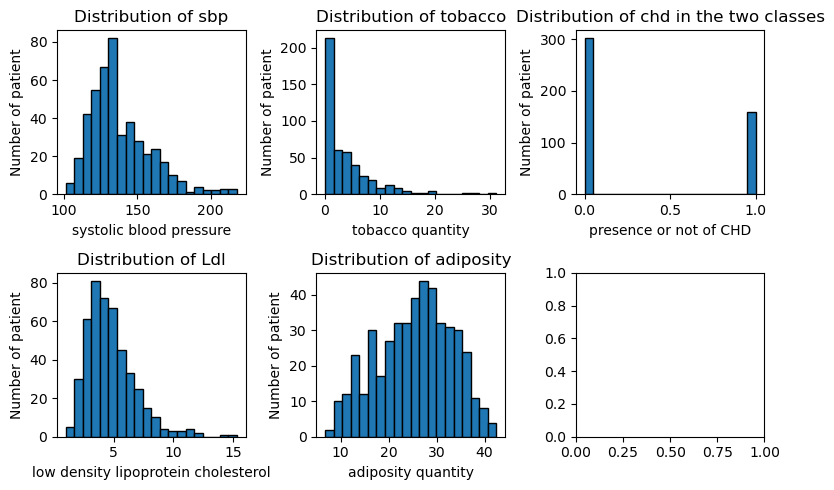

In [8]:
# We now plot the histogramm of data for each variable to see their distribution

l=20 #bin number for histogramms

fig, axes = plt.subplots(2, 3, figsize=(8, 5))

# Histogramm of the variable 'sbp'
tab['sbp'].hist(edgecolor='black', bins=l, ax=axes[0, 0])
axes[0, 0].grid(False)
axes[0, 0].set_title('Distribution of sbp')
axes[0, 0].set_xlabel('systolic blood pressure')
axes[0, 0].set_ylabel('Number of patient')

# Histogramm of the variable 'tobacco'
tab['tobacco'].hist(edgecolor='black', bins=l, ax=axes[0, 1])
axes[0, 1].grid(False)
axes[0, 1].set_title('Distribution of tobacco')
axes[0, 1].set_xlabel('tobacco quantity')
axes[0, 1].set_ylabel('Number of patient')

# Histogramm of the variable 'ldl'
tab['ldl'].hist(edgecolor='black', bins=l, ax=axes[1, 0])
axes[1, 0].grid(False)
axes[1, 0].set_title('Distribution of Ldl')
axes[1, 0].set_xlabel('low density lipoprotein cholesterol')
axes[1, 0].set_ylabel('Number of patient')

# Histogramm of the variable 'adiposity'
tab['adiposity'].hist(edgecolor='black', bins=l, ax=axes[1, 1])
axes[1, 1].grid(False)
axes[1, 1].set_title('Distribution of adiposity')
axes[1, 1].set_xlabel('adiposity quantity')
axes[1, 1].set_ylabel('Number of patient')

# Histogramm of the classes 'chd'
tab['chd'].hist(edgecolor='black', bins=l, ax=axes[0, 2])
axes[0, 2].grid(False)
axes[0, 2].set_title('Distribution of chd in the two classes')
axes[0, 2].set_xlabel('presence or not of CHD')
axes[0, 2].set_ylabel('Number of patient')


plt.tight_layout()
plt.show()


These first five distributions display strong bias: First, none of them is distributed as Gaussian. Adiposity is a candidate but not enough centered to make the assumptions that the draws of each example are independants and use it in our classification. Sbp and LDLC distribution are not centered and tobacco histogramm is exponentially decreasing. There are outliers in LDLC and tobacco distributions but not enough to influence the distribution. The class distributions of CHD shows a ratio of nearly 2/3-1/3 in the two labels, which should be taken into account when we will evaluate the model.

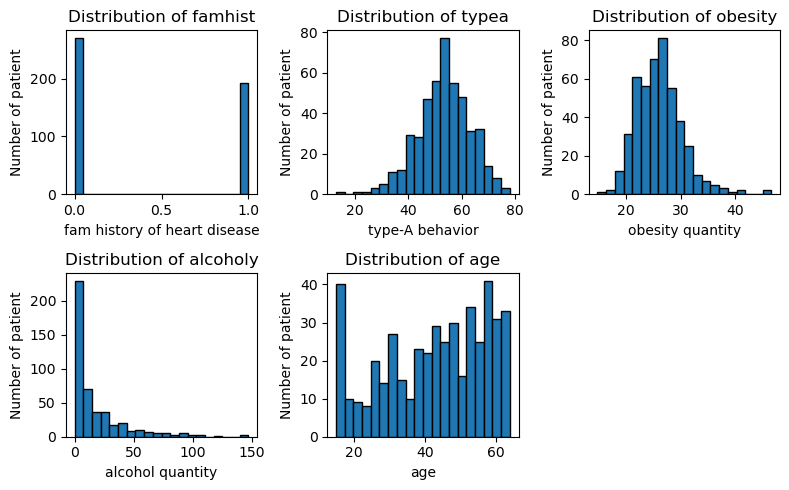

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5))

# Histogramme of the variable 'famhist'
tab['famhist'].hist(edgecolor='black', bins=l, ax=axes[0, 0])
axes[0, 0].grid(False)
axes[0, 0].set_title('Distribution of famhist')
axes[0, 0].set_xlabel('fam history of heart disease')
axes[0, 0].set_ylabel('Number of patient')

# Histogramme of the variable 'typea'
tab['typea'].hist(edgecolor='black', bins=l, ax=axes[0, 1])
axes[0, 1].grid(False)
axes[0, 1].set_title('Distribution of typea')
axes[0, 1].set_xlabel('type-A behavior')
axes[0, 1].set_ylabel('Number of patient')

# Histogramme of the variable 'obesity'
tab['obesity'].hist(edgecolor='black', bins=l, ax=axes[0, 2])
axes[0, 2].grid(False)
axes[0, 2].set_title('Distribution of obesity')
axes[0, 2].set_xlabel('obesity quantity')
axes[0, 2].set_ylabel('Number of patient')

# Histogramme of the variable 'alcohol'
tab['alcohol'].hist(edgecolor='black', bins=l, ax=axes[1, 0])
axes[1, 0].grid(False)
axes[1, 0].set_title('Distribution of alcoholy')
axes[1, 0].set_xlabel('alcohol quantity')
axes[1, 0].set_ylabel('Number of patient')

# Histogramme of the variable 'age'
tab['age'].hist(edgecolor='black', bins=l, ax=axes[1, 1])
axes[1, 1].grid(False)
axes[1, 1].set_title('Distribution of age')
axes[1, 1].set_xlabel('age')
axes[1, 1].set_ylabel('Number of patient')

fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()

Here, we can see that famhist binary distribution is more or less balanced. Obesity and typea variable can be considered as Gaussian distributions and alcoholy, as previously seen with tobacco, is exponentially decreasing. The age distribution is nearly uniforme and we can see a negligable part of outliers in obesity and alcoholy variables. These remarks will be useful to help us understand the performances of our models to classify based on every variables.

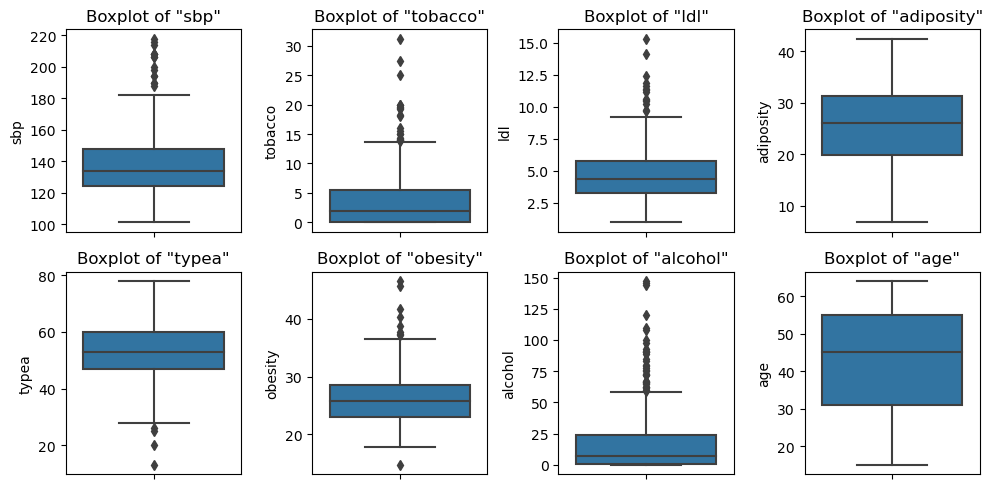

In [10]:
#Showing the boxplots for variables

fig, axes = plt.subplots(2, 4, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate(['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']):
    sns.boxplot(y=tab[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of "{col}"')

plt.tight_layout()
plt.show()


## 2.2 Independence Analysis between variables

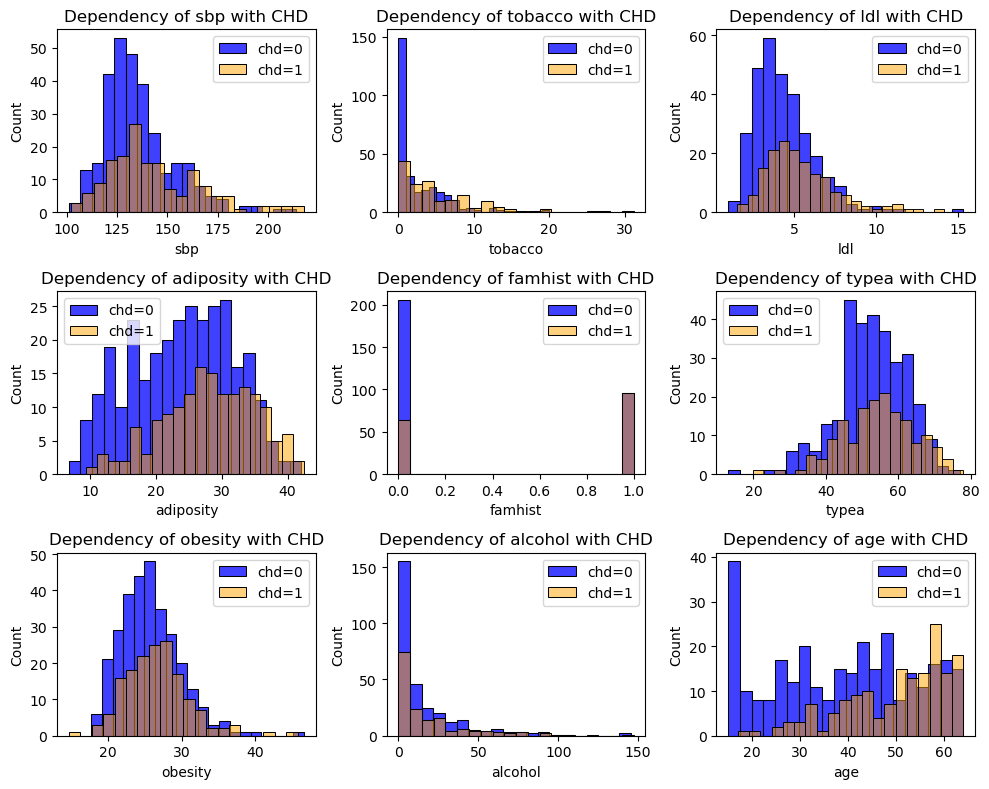

In [11]:
#Ploting variables histogramm with and without CHD to see if there are dependancy between chd and any variables

fig, axes = plt.subplots(3, 3, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate([col for col in tab.columns if col != 'chd']):
    sns.histplot(x=col, data=tab[tab['chd'] == 0], color='blue', label='chd=0', ax=axes[i], kde=False, bins=l)
    sns.histplot(x=col, data=tab[tab['chd'] == 1], color='orange', label='chd=1', ax=axes[i], kde=False, bins=l, alpha=0.5)

    axes[i].set_title(f'Dependency of {col} with CHD')
    axes[i].legend()

plt.tight_layout()
plt.show()

These histogramms show us which variable is likely to be discriminant in the models to classify the presence of CHD: sbp, ldlc, type a and obesity don't permit to discriminate  the presence of chd based on the range of their values since we retrieve a fair amount of both presence and absence of chd in all their datarange. Meanwhile, tobacco and age display a strong link between low values and the absence of chd since the CHD-absents patient are higly represented in these ranges of data although it seems that a high  consumption of tobacco doesn't discriminate between the absence or presence of CHD. These two informations are however helpful as classification models will tend to give a higher importance to variables that can discriminate better the classification. The same remark about alcohol could be said although it's in a smaller measure. The adiposity also seems like a good indicator for the classification since the higher values are more likely to be obtained in patients that have CHD while a low adiposity could also be correlated to the absence of CHD.

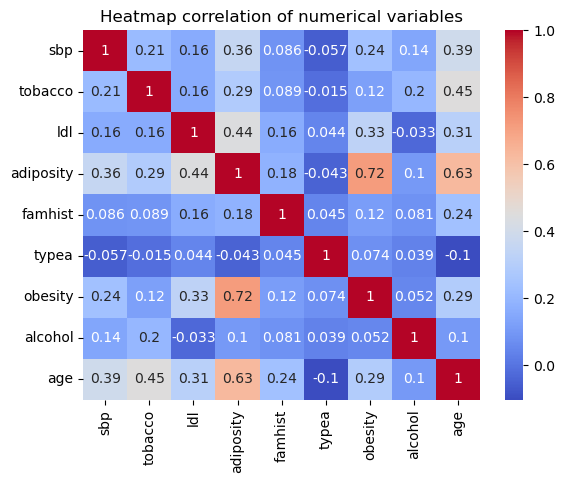

In [12]:
# We now choose to plot correlation heatmap between variables to see if some variables are higly correlated between them. This would
# allows us to remove one of the two variables from our model if they are highly correlated.

num_vars=['sbp', 'tobacco', 'ldl', 'adiposity','famhist','typea', 'obesity', 'alcohol', 'age']
data_num=tab[num_vars]
sns.heatmap(data_num.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap correlation of numerical variables')
plt.show()

As we can see in this heatmap, most variables have no correlation to eachother. However, we can see that age and adiposity on the one hand, and obesity and adiposity on the other hand are correlated. We can't remove adiposity from the model though as the coefficient (0.72 and 0.63) are too low to permit to lost the information contained in adiposity. We know now more information about the data we will use in our models to classify the presence of CHD.

In [13]:
# Separation of data into predictor and target variables

X = tab.drop('chd', axis=1) # predictor variables

y = tab['chd'] # target variables

# 3 Classification Models

## 3.1 Classification Decision Tree

In [14]:
 # installing the necessary package

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_text
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.metrics import f1_score

###  Selection of variables

 ### Decision Tree construction

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0) # We chose our test-size to be at 0.33 after trying different proportions and
# looking at the performance of the model.

# Construction of the decision tree by gini criterion
tree = DecisionTreeClassifier(random_state=0)
treefit=tree.fit(X_train, y_train)

# Tree visualization
#plt.figure(figsize=(40,30))
#plot_tree(tree, feature_names=X.columns.tolist())
#plt.show()
#r = export_text(treefit);
#print(r)

#### Most important variables in the decision tree:

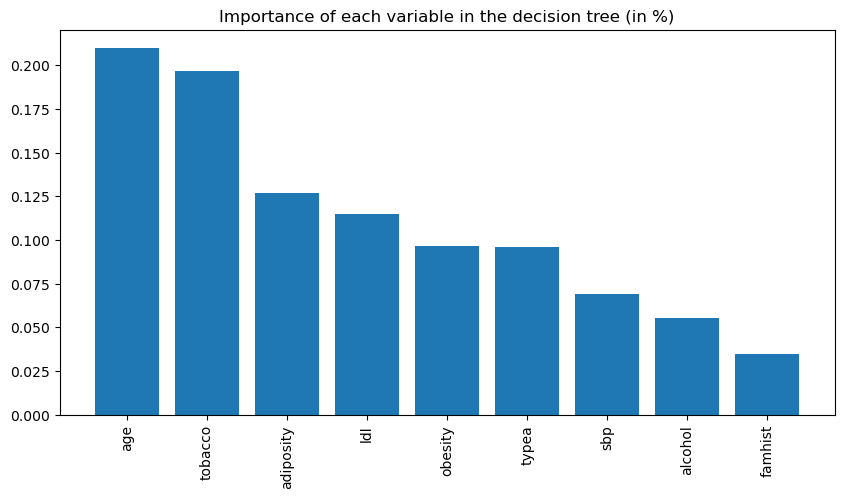

In [19]:
# Display importance variable
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Importance of each variable in the decision tree (in %)")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

The decision tree fitting has shown different results in the importance of variables than what we thought based on the data analysis: while tobacco and adiposity are still high in the table as expected, the fitting hasn't used alchol as much as we thought. The age is first as could be expected since it had a real power to discriminate CHD in low values of the histogramm.

### 3.2.2 Tree performance evaluation

In [20]:
# Training set predictions
y_train_pred=treefit.predict_proba(X_train)
predxTree_train=np.argmax(y_train_pred,axis=1)
#y_train_pred = treefit.predict(X_train)

# Performance evaluation on training set
train_accuracy = accuracy_score(y_train, predxTree_train)
train_confusion = confusion_matrix(y_train, predxTree_train)
train_classification = classification_report(y_train, predxTree_train)

print('Performance on train set')
print('Train Accuracy : ', train_accuracy)
print('Train Confusion matrix : \n', train_confusion)
print('Train Classification report : \n', train_classification)

# Predictions on test set
y_test_pred = treefit.predict_proba(X_test)
predxTree_test=np.argmax(y_test_pred,axis=1)

# Performance evaluation on test set
print('Performance on test set')
test_accuracy = accuracy_score(y_test, predxTree_test)
test_confusion = confusion_matrix(y_test, predxTree_test)
test_classification = classification_report(y_test, predxTree_test)

print('Test Accuracy : ', test_accuracy)
print('Test Confusion matrix : \n', test_confusion)
print('Test Classification report : \n', test_classification)

Performance on train set
Train Accuracy :  1.0
Train Confusion matrix : 
 [[202   0]
 [  0 106]]
Train Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00       106

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308

Performance on test set
Test Accuracy :  0.6558441558441559
Test Confusion matrix : 
 [[76 24]
 [29 25]]
Test Classification report : 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74       100
           1       0.51      0.46      0.49        54

    accuracy                           0.66       154
   macro avg       0.62      0.61      0.61       154
weighted avg       0.65      0.66      0.65       154



The training set shows a 100% accuracy performance, as well as in other metrics, a possible hint of overfitting. In the test set however, the accuracy is 65% which we can't truly judge without comparing to other models. The decision tree is a pretty simple model which is useful in our case since we only have a few hundreds examples, the use of decision tree is thus justified even though it could not be the best model that we will use. In precision, recall and F1-score the  scores are roughly 74% within the CHd-absent population while it drops to 49% in the CHd-present population. Since the two groups are not balanced, we can assume that the available features are not complete to compensate this unbalance, or atleast that they are not enough relevant to predict the presence of CHD in a person.

###  ROC Curve

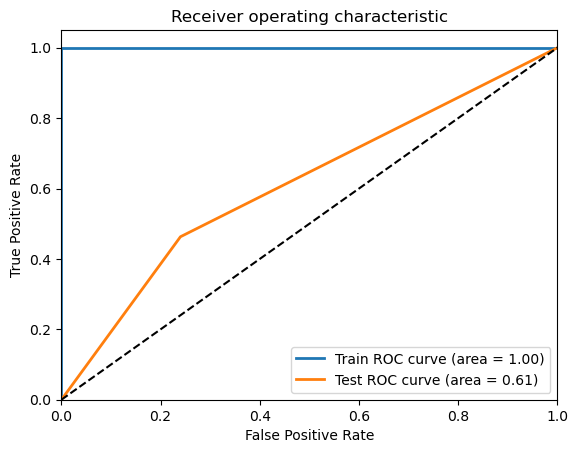

In [21]:
# predictions Training set

y_train_prob = treefit.predict_proba(X_train)[:, 1]
predxTree_train=np.argmax(y_train_pred,axis=1)

# Predictions on test set
#y_test_pred = treefit.predict(X_test)
y_test_prob = treefit.predict_proba(X_test)[:, 1]
predxTree_test=np.argmax(y_test_pred,axis=1)

# ROC curve for train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# ROC curve for test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

plt.figure()
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.2f)' % roc_auc_train, linewidth=2)
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

 The ROC curve gives us a more precise insight of the power of decision tree in our case. Here, the area is 0.61 which is nearly comparable to a random classificator (0.5). Thus, we can conclude that the decision tree with no tuned parameters is not a good classifier for this problem. Since the training data have been perfectly fit to the decision tree but doesn't generalize well to new data, we conclude that the model is overfitting.

### 3.2.4 Decision tree optimization

Here we will change the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.A high maximum depth value causes overfitting, and a low value causes underfitting.

By reducing the maximum depth, we can control the complexity of the shaft and avoid the previous overfitting.

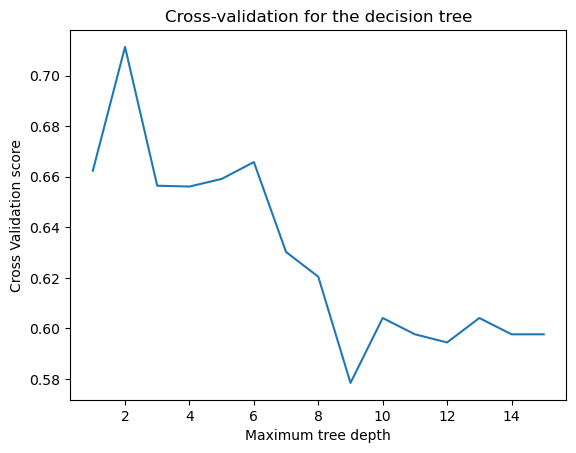

The best maximum depth is : 2


In [22]:
# Search the best max_depth
# List of maximum depths to test
max_depths = range(1, 16)

# List to store cross-validation scores
cv_scores = []

# For each maximum depth, train a decision tree and calculate the cross-validation score.
for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    scores = cross_val_score(tree, X_train, y_train, cv=10)
    cv_scores.append(np.mean(scores))

# Draw the cross-validation graph to choose the complexity of the optimal tree
plt.plot(max_depths, cv_scores)
plt.xlabel('Maximum tree depth')
plt.ylabel('Cross Validation score')
plt.title('Cross-validation for the decision tree')
plt.show()

# Find the maximum depth that gives the best cross-validation score
best_depth = max_depths[np.argmax(cv_scores)]
print('The best maximum depth is :', best_depth)

We observe that a low maximum depth is better for classification. The maximum capacity of generalization is obtained at a maximum depth of two. Since it allows a reduced number of classification domains in the space of variables, we expect this cross-validation score to be the best achievable by this model. This also adds weight on our previous assumption that this set of variable is not complete enough to be classified with a decision tree, since it couldn't be classified by bounded space in more than two variables at the same time.

In [24]:
# Build the decision tree with the chosen maximum depth
tree1 = DecisionTreeClassifier(max_depth=best_depth, random_state=0)
treefit1=tree1.fit(X_train, y_train)

# Tree visualization
#plt.figure(figsize=(20,10))
#plot_tree(tree1, feature_names=X.columns.tolist())
#plt.show()

# other way to understand the Tree visualization
#r = export_text(treefit1);
#print(r)

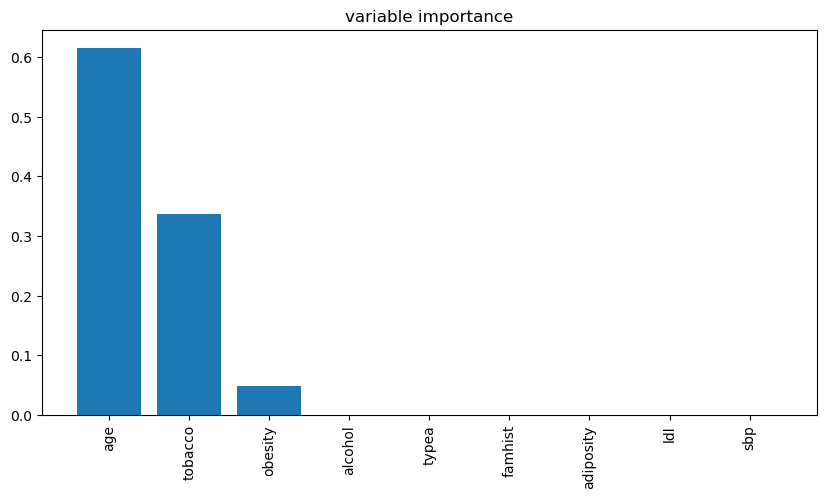

In [25]:
# Display variable importance after maximizing the parameter depth
importances = treefit1.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("variable importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

We observe that the importance of each variable has been widely changed by the maximum depth limitation. Here, the only variables used in the tree are age and tobacco, as we expected from the data analysis part. Obesity is also used as a classifier when the age choice is made.

### 3.2.5 Optimum tree performance

In [26]:
# Training set predictions
#y_train_pred = treefit.predict(X_train)
y_train1_pred=treefit1.predict_proba(X_train)
predxTree1_train=np.argmax(y_train1_pred,axis=1)
# Performance evaluation on training set
train_accuracy = accuracy_score(y_train, predxTree1_train)
train_confusion = confusion_matrix(y_train, predxTree1_train)
train_classification = classification_report(y_train, predxTree1_train)

print('Performance on training set')
print('Train Accuracy : ', train_accuracy)
print('Train Confusion matrix : \n', train_confusion)
print('Train Classification report : \n', train_classification)

# Test set predictions
#y_test_pred = tree.predict(X_test)
y_test1_pred=treefit1.predict_proba(X_test)
predxTree1_test=np.argmax(y_test1_pred,axis=1)
# Performance evaluation on test set
test_accuracy = accuracy_score(y_test, predxTree1_test)
test_confusion = confusion_matrix(y_test, predxTree1_test)
test_classification = classification_report(y_test, predxTree1_test)

print('Performance on test set')
print('Test Accuracy : ', test_accuracy)
print('Test Confusion matrix : \n', test_confusion)
print('Test Classification report : \n', test_classification)




Performance on training set
Train Accuracy :  0.7272727272727273
Train Confusion matrix : 
 [[187  15]
 [ 69  37]]
Train Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.93      0.82       202
           1       0.71      0.35      0.47       106

    accuracy                           0.73       308
   macro avg       0.72      0.64      0.64       308
weighted avg       0.72      0.73      0.70       308

Performance on test set
Test Accuracy :  0.6558441558441559
Test Confusion matrix : 
 [[90 10]
 [43 11]]
Test Classification report : 
               precision    recall  f1-score   support

           0       0.68      0.90      0.77       100
           1       0.52      0.20      0.29        54

    accuracy                           0.66       154
   macro avg       0.60      0.55      0.53       154
weighted avg       0.62      0.66      0.60       154



The accuracy remains the same as previously on the test set - 0.66 - but the model is simplified from the previous one. The recall is accurate for the absent class but drops down for the present class. We interpret it as following: the model try to maximize its efficiency, and is limited to a depth of 2 nodes. Since the 0-class is overrepresented compared to the other one, the best choice for the model is to select the best part of the domains as a "0", which will predict nearly all 0-class examples rightly but will also wrongly predict 1-class examples as 0, increasing the recall in the 0-class and decreasing it in the 1-class. Since precision takes false positive but not false negative in its expression, it's slightly better and more balanced than for the recall, even though the combined f1-score still displays this strong difference between the two classes.

### ROC Curve

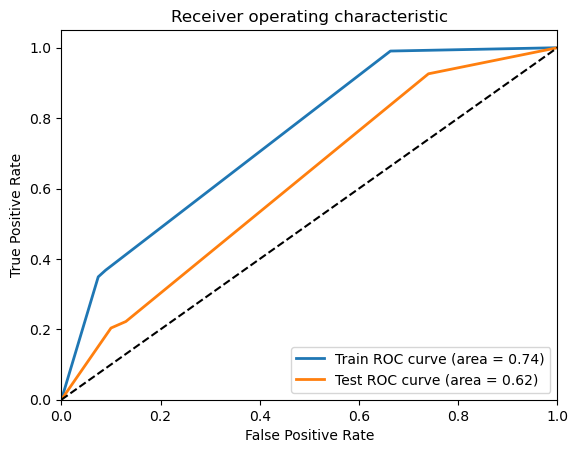

In [27]:
# predictions Training set
y_train_prob = treefit1.predict_proba(X_train)[:, 1]
predxTree1_train=np.argmax(y_train1_pred,axis=1)
# predictions Test set
y_test_prob = treefit1.predict_proba(X_test)[:, 1]
predxTree1_test=np.argmax(y_test1_pred,axis=1)

# ROC curve for train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# ROC curve for test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

plt.figure()
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.2f)' % roc_auc_train, linewidth=2)
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve isn't changed for the test set compared to the previous model, despite it being for different reasons: previously, as the train ROC curve area was 1, we had a total fit of the model to the train dataset (overfitting), with too many nodes in our decision tree. Here, we have a low train roc curve area (0.74) but a similar test roc curve area (0.62). The model is not able to give a better prediction of the class, even at its peak maximum depth, and is generalizing too much for its metrics to be the best. We can conlude that the model is not able with such data to predict correctly the CHD class, and is bounded to an accuracy of 0.66 and a test roc curve area of 0.62

### Conclusion

In conclusion, we tried to evaluate the performance of the decision tree model, both with default hyperparameters and tuned hyperparameters. In both cases, we found that the model was bounded. With default hyperparameters, the model is overfitting to the data and is having a maximum_depth too consequent. This results in a low efficiency for the test, and would have required more data to be more precise with this complexity. Reciprocally, at the best maximum depth, we found that the metrics were not giving any better results, mainly because the model couldn't generalized easily with a limited number of nodes. The balance between the classes also proved to be a problem for the model to learn and we assumed that It is was partly due to given features that couldn't capture all the relevant information to predict correctly the CHD.

## 3.3 Bagging Modelling

We now train a bagging model to see if averaging several decision trees can obtain better classification than a single one. Since we subdivise our data into samples, we expect the performance to be less reliant on the split between test and train sets than previously.

In [28]:
# installing the necessary package

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_text
from sklearn.ensemble import BaggingClassifier

In [29]:
# Division of data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Bagging Model and fitting on train set
treemod = tree.DecisionTreeClassifier()
treemodfit=treemod.fit(X_train, y_train)
bagmod=BaggingClassifier(base_estimator=treemod, n_estimators=10, random_state=0) #We select ten different samples of data to obtain our averaged model.
bagmodfit=bagmod.fit(X_train, y_train)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### 3.3.1 Evaluation of Bagging performance

In [30]:
# Training set predictions
y_train_pred = bagmodfit.predict_proba(X_train)
predxBagg_train=np.argmax(y_train_pred,axis=1)

# Performance evaluation on training set
train_accuracy = accuracy_score(y_train, predxBagg_train)
train_confusion = confusion_matrix(y_train, predxBagg_train)
train_classification = classification_report(y_train, predxBagg_train)

print('Performance on train set')
print('Train Accuracy : ', train_accuracy)
print('Train Confusion matrix : \n', train_confusion)
print('Train Classification report : \n', train_classification)

# Predictions on test set
y_test_pred = bagmodfit.predict_proba(X_test)
predxBagg_test=np.argmax(y_test_pred,axis=1)

# Performance evaluation on test set
print('Performance on test set')
test_accuracy = accuracy_score(y_test, predxBagg_test)
test_confusion = confusion_matrix(y_test, predxBagg_test)
test_classification = classification_report(y_test, predxBagg_test)

print('Test Accuracy : ', test_accuracy)
print('Test Confusion matrix : \n', test_confusion)
print('Test Classification report : \n', test_classification)

Performance on train set
Train Accuracy :  0.974025974025974
Train Confusion matrix : 
 [[202   0]
 [  8  98]]
Train Classification report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       202
           1       1.00      0.92      0.96       106

    accuracy                           0.97       308
   macro avg       0.98      0.96      0.97       308
weighted avg       0.98      0.97      0.97       308

Performance on test set
Test Accuracy :  0.6558441558441559
Test Confusion matrix : 
 [[84 16]
 [37 17]]
Test Classification report : 
               precision    recall  f1-score   support

           0       0.69      0.84      0.76       100
           1       0.52      0.31      0.39        54

    accuracy                           0.66       154
   macro avg       0.60      0.58      0.58       154
weighted avg       0.63      0.66      0.63       154



One important thing out of these results is that the accuracy in both datasets hasn't changed from the default decision tree we had before. On the training performance, the model gives accurate results: nearly all metrics are near a hundred percent. Since we are averaging on different decision trees, we expect it to reduce the precedent problem of overfitting. The model could thus have learned correctly the data structure behind the classification. However, while looking at the test performance, we can see that it is not the case: recall, precision and f1-score on default decision tree were all around 0.75 on the 0-label and 0.5 on the 1-label. Here, theses values are more unbalanced, with the recall of 0-class increasing and the recall of 1-class decreasing. The global performance (via f1-score) is unchanged on the CHD-absent class while it decreases dramatically on CHD-present examples. Our interpretation of it is that since there are twice more examples in the first class, the different samples of data in the bootstrap could contain the same examples of the first class, leading to an overrepresentation of these data and a bias toward these in the averaged decision tree. The average model will thus decrease recall for the second class, leading to a worse performance to classify this class. In the next paragraph, we will try to solve this problem by tuning the size of data samples.

### ROC Curve

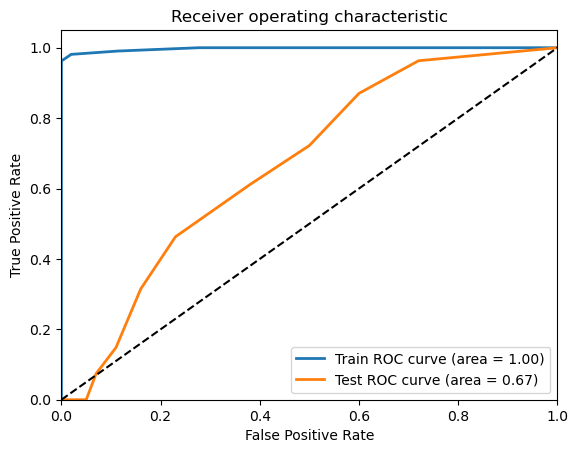

In [31]:
# predictions Training set

y_train_prob = bagmodfit.predict_proba(X_train)[:, 1]

# predictions Test set

y_test_prob = bagmodfit.predict_proba(X_test)[:, 1]


# ROC curve for train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# ROC curve for test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

plt.figure()
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.2f)' % roc_auc_train, linewidth=2)
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The roc curve area on the test dataset has improved from previously: the averaging on several models permits a better discrimination,, which is why we wanted to use it afterall. Hence, this result is expected from the bagging.

### 3.3.2 Bagging optimization

We will now try to otpimize two hyperparameters on the bagging model to increase the performance:
- max_samples : we can restrain the number of examples used in each decision tree. Since the classes are unbalanced, we expect to find an optimal number of samples to use in each. As we see, using all the data shows a bias toward the biggest class, but reducing the sample size could reduce this problem
- number of estimators: we selected 10 decision trees previously but we can also adjust it to see if a small amount of decision trees gives a better prediction
    

In [32]:
# we define a grid to search the best couple of parameters
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'max_samples': [0.1, 0.3, 0.55, 0.8, 1],
    'n_estimators': [i for i in range(1,15,2)]
}

bagmod5 = BaggingClassifier(base_estimator=treemod, random_state=0)

grid_search = GridSearchCV(bagmod5, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters :", grid_search.best_params_)

Best hyperparameters : {'max_samples': 0.3, 'n_estimators': 9}


We obtain the best performances out of the bagging with a sample size of 30% of the total size, for each estimator. This should theoritically decrease the unbalance between the two classes and help provide better results for the generalization of the second class. Our arbitrary choice of 10 decision trees was also not far from its optimum, as the model finds it better to use 9 of them.

In [33]:
# Creating the bagging with the best parameters
warnings.simplefilter(action='ignore', category=FutureWarning)
bagmod1 = BaggingClassifier(base_estimator=treemod,n_estimators=grid_search.best_params_['n_estimators'], max_samples=grid_search.best_params_['max_samples'], oob_score=True, random_state=0)
# fitting the model
bagmod1fit=bagmod1.fit(X_train, y_train)
bagmod1fit

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.3,
                  n_estimators=9, oob_score=True, random_state=0)

### Bagging optimization performance

In [34]:
# Training set predictions
y_train1_pred = bagmod1fit.predict_proba(X_train)
predxBagg1_train=np.argmax(y_train1_pred,axis=1)
# Performance evaluation on training set
train_accuracy = accuracy_score(y_train, predxBagg1_train)
train_confusion = confusion_matrix(y_train, predxBagg1_train)
train_classification = classification_report(y_train, predxBagg1_train)

print('Performance on training set')
print('Train Accuracy : ', train_accuracy)
print('Train Confusion matrix : \n', train_confusion)
print('Train Classification report : \n', train_classification)

# Test set predictions
y_test_pred = bagmod1fit.predict_proba(X_test)
predxBagg1_test=np.argmax(y_test1_pred,axis=1)
# Performance evaluation on test set
test_accuracy = accuracy_score(y_test, predxBagg1_test)
test_confusion = confusion_matrix(y_test, predxBagg1_test)
test_classification = classification_report(y_test, predxBagg1_test)

print('Performance on test set')
print('Test Accuracy : ', test_accuracy)
print('Test Confusion matrix : \n', test_confusion)
print('Test Classification report : \n', test_classification)



Performance on training set
Train Accuracy :  0.8409090909090909
Train Confusion matrix : 
 [[184  18]
 [ 31  75]]
Train Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       202
           1       0.81      0.71      0.75       106

    accuracy                           0.84       308
   macro avg       0.83      0.81      0.82       308
weighted avg       0.84      0.84      0.84       308

Performance on test set
Test Accuracy :  0.6558441558441559
Test Confusion matrix : 
 [[90 10]
 [43 11]]
Test Classification report : 
               precision    recall  f1-score   support

           0       0.68      0.90      0.77       100
           1       0.52      0.20      0.29        54

    accuracy                           0.66       154
   macro avg       0.60      0.55      0.53       154
weighted avg       0.62      0.66      0.60       154



The performances of this optimized bagging are different from previously. Here, there is a trade of between increase of the first class recall and decrease of the second class recall. As in the previous models, this models edges toward classifying the biggest class rightly, with a bigger domain than expected, while having troubles to classify the smallest class, even with different samples sizes. This could suggest that the amount of data is definitely not enough to classify them correctly, as the bounded accuracy (0.65) shows.

### ROC Curve

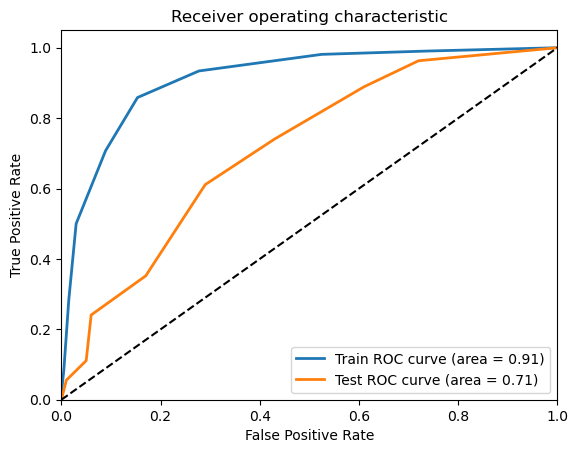

In [35]:
# predictions Training set
#y_train_pred = bagmodfit.predict(X_train)
y_train_prob = bagmod1fit.predict_proba(X_train)[:, 1]

# predictions Test set
#y_test_pred = bagmodfit.predict(X_test)
y_test_prob = bagmod1fit.predict_proba(X_test)[:, 1]


# ROC curve for train set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# ROC curve for test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

plt.figure()
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.2f)' % roc_auc_train, linewidth=2)
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

One important change of the optimisation of the bagging is the improvement of the ROC area for the test part. Here, It gets better than both decision tree and default bagging, which is what we wanted to do. While the metrics are not improved on the second class, it still gets a best performance rating than previously, meaning that model can more easily detect true positive than previously. We conclude that the optizimation of hyperparameters remains useful in this case.

## 3.4 Random Forest Modelling

### Without Optimization

In [36]:
# installing the necessary package

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [37]:
# Division of data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Random Forest Model and fitting on train set

RF = RandomForestClassifier(random_state=0) #The number of features used in each decision tree is set by default to the square root of the number of features, here 3.
RFfit = RF.fit(X_train, y_train)

### Prediction on train and test set

In [38]:
y_trainRF_pred = RFfit.predict(X_train)
y_testRF_pred = RFfit.predict(X_test)

### Evaluation of model performance

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_trainRF_pred))
print(classification_report(y_test, y_testRF_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00       106

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       100
           1       0.56      0.37      0.44        54

    accuracy                           0.68       154
   macro avg       0.63      0.61      0.61       154
weighted avg       0.66      0.68      0.66       154



Out these results, we note one important thing: the random forest has totally fitted the data, which means that it's probably overfitted. On the test part, we observe better results than previously. For example, the 1-class examples on the test set are truly predicted as 1 in 37% of all the case. This could mean that a reduced number of variables is better to predict these than when we were using all variables as before. The interpretation that can be argued is that the clusters of same classes patients are very diffuse in the latent space and there are not enough points in each cluster of this space to learn a precise classification. Thus, we have to use subsamples of variables spaces to clusterize data without having to reduce the clusters size.

### ROC curve

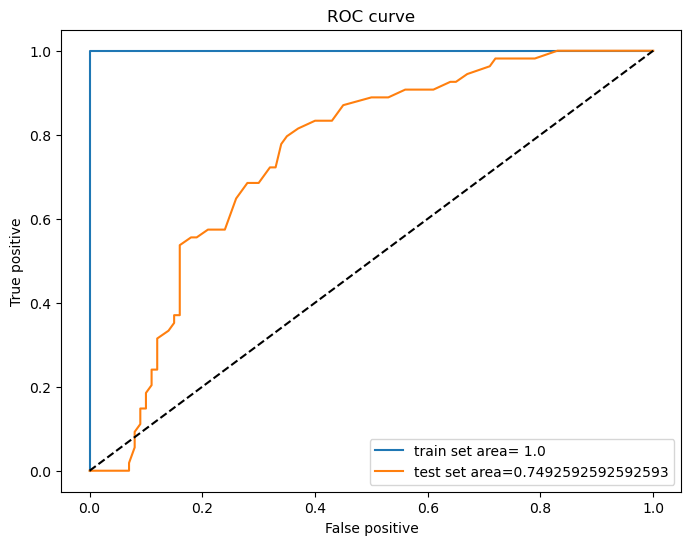

In [40]:
y_train_prob = RFfit.predict_proba(X_train)[:, 1]
y_test_prob = RFfit.predict_proba(X_test)[:, 1]

train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='train set area= '+str(roc_auc_score(y_train, y_train_prob)))
plt.plot(test_fpr, test_tpr, label='test set area='+str(roc_auc_score(y_test, y_test_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.title('ROC curve')
plt.legend()
plt.show()


Consequently, the ROC curve is also better since the model doesn't have to make assumptions on domains with less points. It can thus produce a more precise output, which results in a higher ROC area in the test (0.75 compared to 0.68-) but also provides the insight of an overfitting, with 1 as ROC curve area for train set.

### Variable Importance

ratio of importance for each variabe
    Variable  Importance
0    tobacco    0.170758
1        age    0.153837
2        ldl    0.129318
3  adiposity    0.124463
4    obesity    0.100590
5        sbp    0.096782
6      typea    0.094404
7    alcohol    0.090027
8    famhist    0.039820


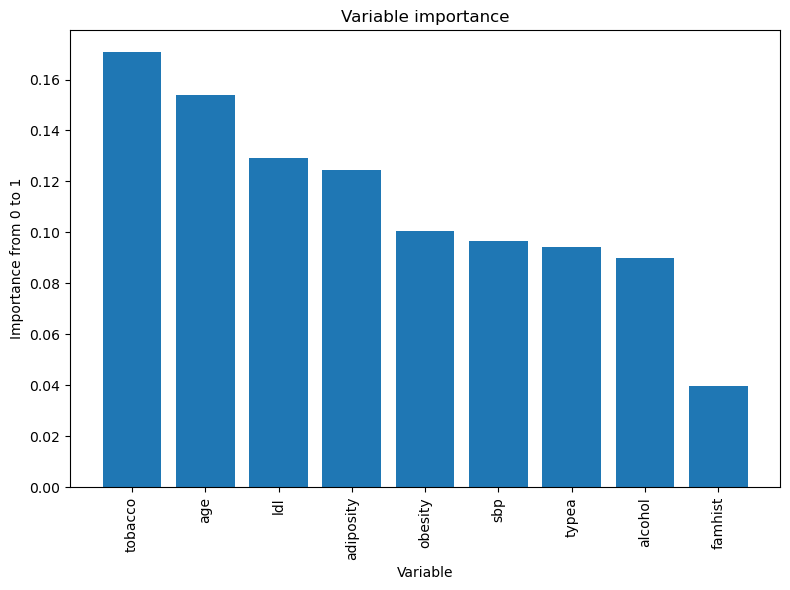

In [41]:
importance = RFfit.feature_importances_
importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("ratio of importance for each variabe")
print(importance_df)

plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance from 0 to 1')
plt.title('Variable importance')
plt.tight_layout()
plt.show()

Compared to a single tree, the random forest displays a much more linear importance to each variable respectively. This comes from the fact that this model uses loads of decision tree with different random subsets of variables for each of them, which lead them to be more or less as valuable in the model as each other.  

### Random Forest optimisation by Cross Validation

### Hyper-parameters searching and model training

In [42]:
# As in the bagging, we will try to see if changing the number of trees or the maximal depth of each of them change something
param_grid = {
    'n_estimators': [100*i for i in range(1,6,1)],
    'max_depth': [j for j in range(1,9,1)]
}

RF = RandomForestClassifier(oob_score=True, random_state=0,max_features=int(np.sqrt(X.shape[1])))

#We use these lines to search for the optimized couple of hyper-parameters for the model
grid_search = GridSearchCV(RF, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyper-parameters :", grid_search.best_params_) # it will take some time for the results to be displayed. you should wait no more than 5 min.

Best hyper-parameters : {'max_depth': 4, 'n_estimators': 500}


The grid search found that the default depth (3) wasn't the optimized one for the decision tree. As we can see, using 4 variables in each decision tree, and averaging the forest on 500 trees is the best way to obtain the maximized performance. Over this number of variables, the clusters size are too small to have a solid classification.

In [43]:
RF_new = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], oob_score=True, random_state=42)

RF_newfit=RF_new.fit(X_train, y_train)
RF_newfit

RandomForestClassifier(max_depth=4, n_estimators=500, oob_score=True,
                       random_state=42)

### Prediction on train and test set

In [44]:
y_trainRF2_pred = RF_newfit.predict(X_train)
y_testRF2_pred = RF_newfit.predict(X_test)

### Evaluation of model performance

In [45]:
print(classification_report(y_train, y_trainRF2_pred))
print(classification_report(y_test, y_testRF2_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       202
           1       0.89      0.60      0.72       106

    accuracy                           0.84       308
   macro avg       0.86      0.78      0.80       308
weighted avg       0.85      0.84      0.83       308

              precision    recall  f1-score   support

           0       0.71      0.88      0.79       100
           1       0.60      0.33      0.43        54

    accuracy                           0.69       154
   macro avg       0.65      0.61      0.61       154
weighted avg       0.67      0.69      0.66       154



The optimized random forest has changed its metrics compared to the default one: We don't see in this case the overfitting on train set that was present, which could be due to the number of decision trees selected, going from 100 in the previous to 500 now, which also multiplies the number of different subsamples of the dataset used. In the test set, we see that the accuracy is slightly better, which is traduced by an improvement in the other metrics. The recall remains low in 1-class, which means that the model still fails to generalize the presence of CHD. Since we used three different models with optimized parameters, and that we have a small amount of data, we could assume that it is due to the structure of CHD-positive data that is too complex compared to the complexity of our model and the amount of data we have. The balance between the two classes could also be considered since the subsamples of each decision tree will also tend to the 2/3-1/3 proportions, and thus fail to generalize 1-class example as well as 0-class.

### ROC Curve

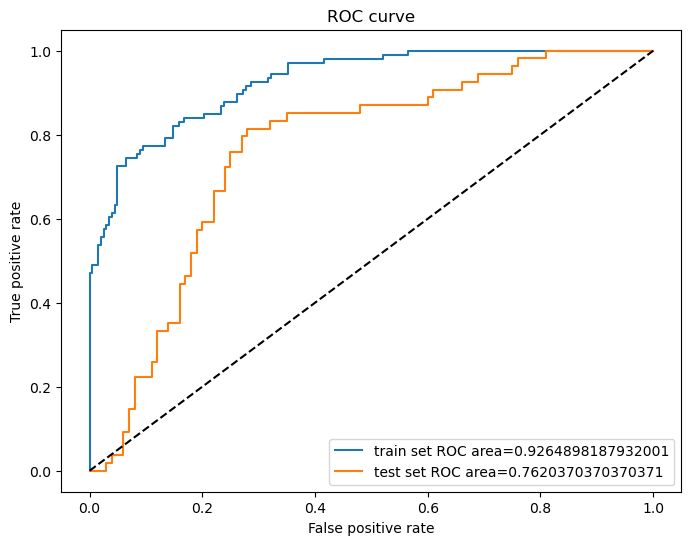

In [46]:
y_train_prob = RF_newfit.predict_proba(X_train)[:, 1]
y_test_prob = RF_newfit.predict_proba(X_test)[:, 1]

train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='train set ROC area='+str(roc_auc_score(y_train, y_train_prob)))
plt.plot(test_fpr, test_tpr, label='test set ROC area='+str(roc_auc_score(y_test, y_test_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

We see a small improvement in the ROC test area. The form of the curve is also edging closer to what we want to get: at a small false positive rate (0-0.3) the true positive rate increases drastically while it increases softly at a false positive rate from 0.3 to 1. The trade-off between the two however is too much consequent to have reliable predictor. We think that it could be due to the amount of 1-class examples that is too small to clusterize them precisely and establish domains in the latent variables space. This seems to be a recurrent problem with any type of models that we used since the performance on each of them has only partially improved. The optimization of hyperparameters has solved the precedent problem of overfitting while improving its generalization capacity.

### Importance Variable

Features importance :
    Variable  Importance
0    tobacco    0.241944
1        age    0.234200
2        ldl    0.123706
3  adiposity    0.097903
4      typea    0.077362
5    obesity    0.066132
6    alcohol    0.063396
7        sbp    0.049164
8    famhist    0.046193



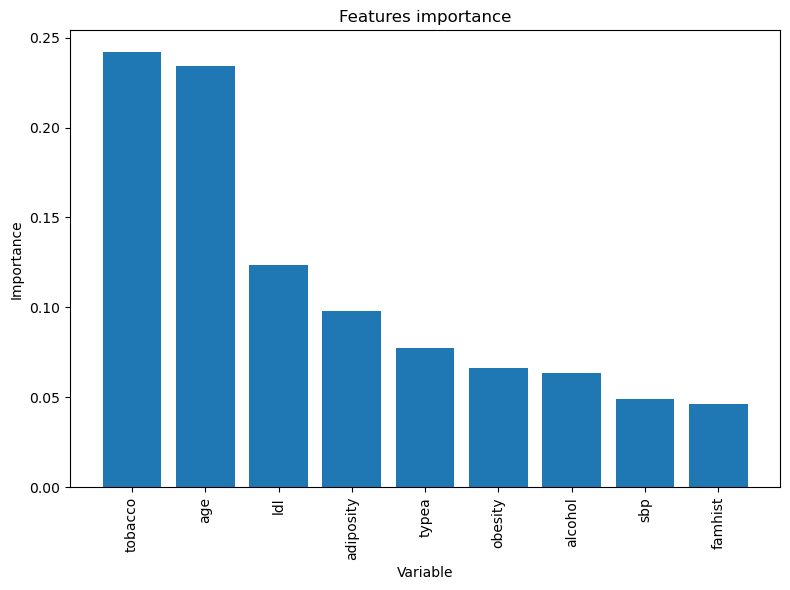

In [47]:
importance = RF_newfit.feature_importances_

importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("Features importance :")
print(importance_df)
print()

plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Features importance')
plt.tight_layout()
plt.show()

The age and tobacco become proeminent variables in this model to classify CHD. The histogramms of classes showed that at small values of age and tobacco consumption the risk of CHD was lower, which we think could have been a big assumption of this model: since the classes are unbalanced in favour of no-CHD, the trees find a better performance into determining their domains, which leads to a decrease of performance since in the high values, both variables are unable to discriminate the presence of CHD. This could also explain why the model was bounded in terms of performance, having to trade between generalizing too much with these variables with the assumption that they are determinant globally because they are so at low values and not generalizing at all and use the trust of the fitting too much with the possibility to not be able to classify efficiently examples that look easy to.

In [48]:
def plot_roc(X_test,y_test,models): # define a plot_roc on test set

    for name,models in models.items():

        if hasattr(models,'decision_function'):
            probs=Model.decision_function(X_test) # classifier models depends on decision

        elif hasattr(models,'predict_proba'):
            probs=models.predict_proba(X_test) [:,1] # classifier models depends on prediction

        fpr,tpr,threshold=roc_curve(y_test,probs)
        roc_auc=auc(fpr,tpr)
        print('ROC AUC =%0.2f'%roc_auc)
        plt.plot(fpr,tpr,label='%s(ROC AUC =%0.2f)'%(name,roc_auc))

    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.show()


# 4 Comparaison between Decision Tree, Bagging and RandomForest

Previously, we studied our dataset using different classification models, and now we want to divide our data into K subsets in order to achieve better performance than we observed, thus reducing the risk of over-fitting or under-fitting. In this part, we will work with the classifier models optimized by hyperparameters.

### Decision Tree Performances Kfold

In [49]:
# KFold for Accuracy
kfold=KFold(n_splits=15, shuffle=True,random_state=0)
Accuracy1_kfold=cross_val_score(tree1,X,y,cv=kfold,scoring='accuracy')
print(f"Scores mean for accuracy K-Fold: {np.mean(Accuracy1_kfold)}")

Scores mean for accuracy K-Fold: 0.6670967741935484


In [50]:
# KFold for recall
Recall1_kfold=cross_val_score(tree1,X,y,cv=kfold,scoring='recall')
print(f"Scores mean for recall K-Fold: {np.mean(Recall1_kfold)}")

Scores mean for recall K-Fold: 0.31974469974469966


In [51]:
# KFold for precision
Precision1_kfold=cross_val_score(tree1,X,y,cv=kfold,scoring='precision')
print(f"Scores mean for precision K-Fold: {np.mean(Precision1_kfold)}")

Scores mean for precision K-Fold: 0.4881746031746032


In [52]:
# KFold for f1_score
f11_kfold=cross_val_score(tree1,X,y,cv=kfold,scoring='f1')
print(f"Scores mean for f1-score K-Fold: {np.mean(f11_kfold)}")

Scores mean for f1-score K-Fold: 0.3726514661310732


### Bagging Performances Kfold

In [53]:
warnings.simplefilter(action='ignore', category=FutureWarning)
# KFold for Accuracy
kfold=KFold(n_splits=15, shuffle=True,random_state=0)
Accuracy2_kfold=cross_val_score(bagmod1,X,y,cv=kfold,scoring='accuracy')
print(f"Scores mean for accuracy K-Fold: {np.mean(Accuracy2_kfold)}")

Scores mean for accuracy K-Fold: 0.6731182795698925


In [54]:
# KFold for recall
Recall2_kfold=cross_val_score(bagmod1,X,y,cv=kfold,scoring='recall')
print(f"Scores mean for recall K-Fold: {np.mean(Recall2_kfold)}")

Scores mean for recall K-Fold: 0.4724022274022274


In [55]:
# KFold for precision
Precision2_kfold=cross_val_score(bagmod1,X,y,cv=kfold,scoring='precision')
print(f"Scores mean for precision K-Fold: {np.mean(Precision2_kfold)}")

Scores mean for precision K-Fold: 0.5363769563769565


In [56]:
# KFold for f1_score
f12_kfold=cross_val_score(bagmod1,X,y,cv=kfold,scoring='f1')
print(f"Scores mean for f1-score K-Fold: {np.mean(f12_kfold)}")

Scores mean for f1-score K-Fold: 0.4907873516232649


### Random Forest Performances kfold

In [57]:
# KFold for Accuracy
Accuracy3_kfold=cross_val_score(RF_new,X,y,cv=kfold,scoring='accuracy')
print(f"Scores mean for accuracy K-Fold: {np.mean(Accuracy3_kfold)}")

Scores mean for accuracy K-Fold: 0.7057347670250896


In [58]:
# KFold for recall
Recall3_kfold=cross_val_score(RF_new,X,y,cv=kfold,scoring='recall')
print(f"Scores mean for recall K-Fold: {np.mean(Recall3_kfold)}")

Scores mean for recall K-Fold: 0.39436831686831686


In [59]:
# KFold for precision
Precision3_kfold=cross_val_score(RF_new,X,y,cv=kfold,scoring='precision')
print(f"Scores mean for precision K-Fold: {np.mean(Precision3_kfold)}")

Scores mean for precision K-Fold: 0.5853439153439154


In [60]:
# KFold for f1_score
f13_kfold=cross_val_score(RF_new,X,y,cv=kfold,scoring='f1')
print(f"Scores mean for f1-score K-Fold: {np.mean(f13_kfold)}")

Scores mean for f1-score K-Fold: 0.46135756056808674


## Comparing the classification models using the usual indicators and box plots

In [61]:
# Create a data frame for each performance from differents classification models

Accur={'DTree Accuracy':Accuracy1_kfold,'Bagging Accuracy':Accuracy2_kfold,'RF Accuracy':Accuracy3_kfold}
df = pd.DataFrame(Accur)

Recall={'DTree Recall':Recall1_kfold,'Bagging Recall':Recall2_kfold,'RF Recall':Recall3_kfold}
df1 = pd.DataFrame(Recall)

Precision={'DTree Precision':Precision1_kfold,'Bagging Precision':Precision2_kfold,'RF Precision':Precision3_kfold}
df2 = pd.DataFrame(Precision)

F1_score={'DTree F1_score':f11_kfold,'Bagging F1_score':f12_kfold,'RF F1_score':f13_kfold}
df3 = pd.DataFrame(F1_score)

#print(df)
#print(df1)
#print(df2)
#print(df3)

<Axes: >

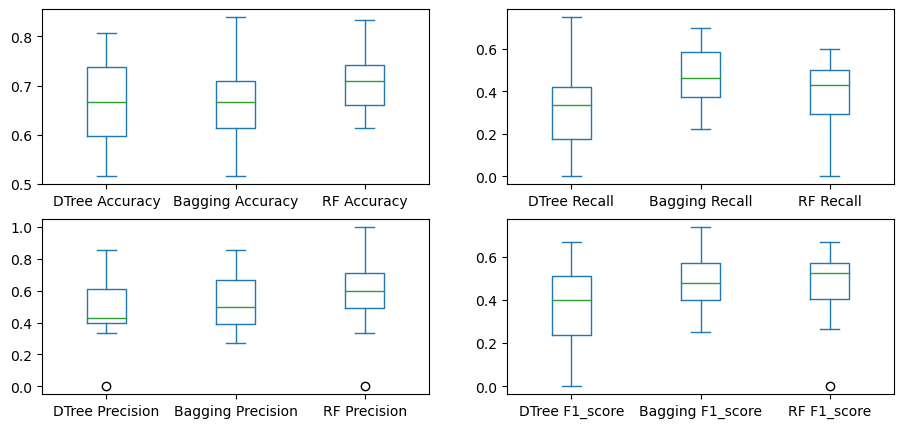

In [62]:
# Create a box plot to compare the performance of each classifier.

fig, axes = plt.subplots(2, 2, figsize=(11, 5))
df.plot(kind='box',ax=axes[0, 0])
df1.plot(kind='box',ax=axes[0, 1])
df2.plot(kind='box',ax=axes[1, 0])
df3.plot(kind='box',ax=axes[1, 1])


## Comparing the classification models with ROC Curve

ROC AUC =0.62
ROC AUC =0.71
ROC AUC =0.76


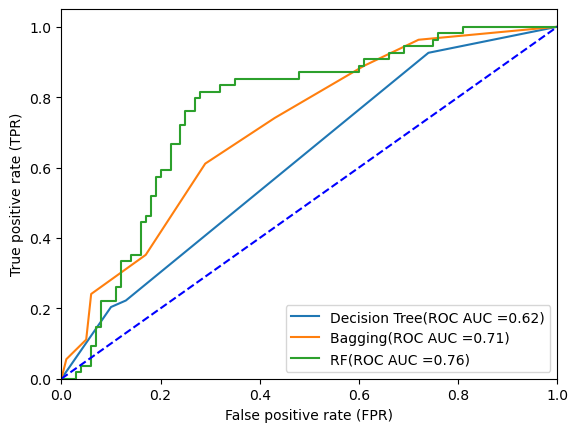

In [63]:
from sklearn.metrics import auc
models={'Decision Tree':tree1,'Bagging':bagmod1,'RF':RF_new} # create a models which contains the 3 classifier optimized
plot_roc(X_test,y_test, models) # apply the function plot_roc

K-fold hasn't changed the conclusions we had before. We found the same kind of metrics than previously, showing us that the random forest was the best model to classify our data. Its functioning makes it easier not to have overfitting and gives a better classification as it uses loads of different criteria on different subsamples of data to learn a classification. The k-fold will thus show the same trend in the performance.

# 5 Classification (Adaboost, gradient boost and stacking)

## 5.1 Default Adaboost

In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=12)

Ab = AdaBoostClassifier(random_state=10) #default parameters are one for the tree depth, 50 decision trees and a learning rate equals to one
Abfit=Ab.fit(X_train, y_train)
y_pred_ab=Abfit.predict_proba(X_test)[:,1];

fpr, tpr, thresholds = roc_curve(y_test, y_pred_ab)
dpr, spr, thresholds = roc_curve(y_train, Abfit.predict_proba(X_train)[:,1])

y_pred_ab_cv = cross_val_predict(Abfit, X_test, y_test, cv=KFold(n_splits=5))

f1 = f1_score(y_test, y_pred_ab_cv)
recall = recall_score(y_test, y_pred_ab_cv)
precision = precision_score(y_test, y_pred_ab_cv)
accuracy = accuracy_score(y_test, y_pred_ab_cv)

print(f"F1 Score (K-Fold): {f1:.2f}")
print(f"Recall (K-Fold): {recall:.2f}")
print(f"Precision (K-Fold): {precision:.2f}")
print(f"Accuracy (K-Fold): {accuracy:.2f}")

F1 Score (K-Fold): 0.48
Recall (K-Fold): 0.50
Precision (K-Fold): 0.46
Accuracy (K-Fold): 0.66


With default parameters, we get slightly better results as in decision tree and bagging. Particularly, recall increases as a result of a focus on the wrongly predicted classes. We next compare it to an optimized one.

## 5.2 Adaboost with optimized parameters

We now try to find the best learning rate and number of estimators to optimize our Adaboost classification. Since it's based on decision tree with a focus on errors, we expect it to have better metrics than in the optimized decision tree (ROC and accuracy ~0.66).

In [65]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import KFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
param_grid = {
'n_estimators': [50, 100, 200],
'learning_rate': [0.01, 0.1, 1.0],

}

adaboost_classifier = AdaBoostClassifier(random_state=10)

grid_search = GridSearchCV(adaboost_classifier, param_grid ,cv=KFold(n_splits=5), scoring='roc_auc')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
AB_new = AdaBoostClassifier(n_estimators=grid_search.best_params_['n_estimators'], learning_rate=grid_search.best_params_['learning_rate'])
AB_newfit_op=AB_new.fit(X_train, y_train)

y_pred_ab=cross_val_predict(AB_newfit_op, X_test, y_test, cv=KFold(n_splits=5))

f1 = f1_score(y_test, y_pred_ab)
recall = recall_score(y_test, y_pred_ab)
precision = precision_score(y_test, y_pred_ab)
accuracy = accuracy_score(y_test, y_pred_ab)

print(f"F1 Score (K-Fold): {f1:.2f}")
print(f"Recall (K-Fold): {recall:.2f}")
print(f"Precision (K-Fold): {precision:.2f}")
print(f"Accuracy (K-Fold): {accuracy:.2f}")

Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}
F1 Score (K-Fold): 0.49
Recall (K-Fold): 0.42
Precision (K-Fold): 0.61
Accuracy (K-Fold): 0.73


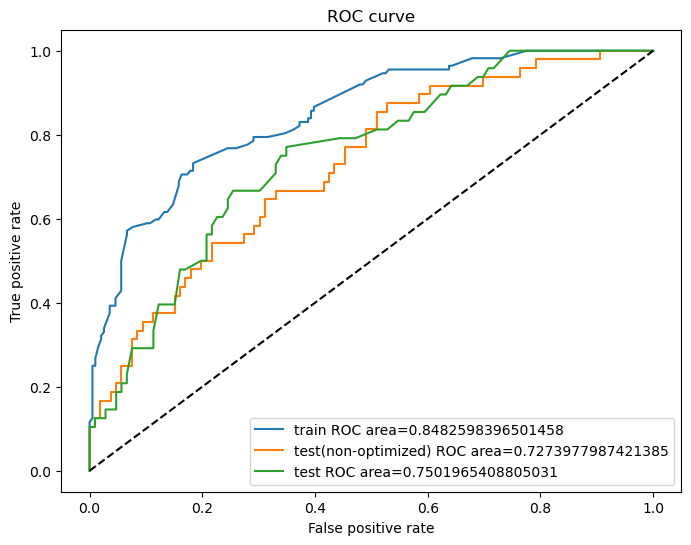

In [66]:
y_pred_ab_cv=AB_newfit_op.predict_proba(X_test)[:,1]
y_pred_ab=Abfit.predict_proba(X_test)[:,1]

train_fpr, train_tpr, _ = roc_curve(y_train, AB_newfit_op.predict_proba(X_train)[:,1])
test_fpr, test_tpr, _ = roc_curve(y_test, y_pred_ab)
train_fpr_t, test_tpr_t, _ = roc_curve(y_test, y_pred_ab_cv)
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='train ROC area='+str(roc_auc_score(y_train, AB_newfit_op.predict_proba(X_train)[:,1])))
plt.plot(test_fpr, test_tpr, label='test(non-optimized) ROC area='+str(roc_auc_score(y_test,y_pred_ab )))
plt.plot(train_fpr_t, test_tpr_t, label='test ROC area='+str(roc_auc_score(y_test,y_pred_ab_cv )))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

The optimization has permitted to improve the performance. Precision,accuracy and roc are the two metrics that have been increased compared to default one.

We can notice that with a small number of weak models, we have a balancing on both datasets. At the level of the performance of the new model, we see the ability to predict on the individual not suffering from chd has an improvement on some performances but a difficulty to predict in the opposite case. however, this classifier has difficulty managing this risk while minimizing the error. To do this, we'll look at other classifiers that are responsible for minimizing the loss function.

## 5.3 Default gradient boost

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

Gb = GradientBoostingClassifier(random_state=0)
Gbfit=Gb.fit(X_train, y_train)

y_pred=Gbfit.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
dpr, spr, thresholds = roc_curve(y_train, Gbfit.predict_proba(X_train)[:,1])

y_pred_gb = cross_val_predict(Gbfit, X_test, y_test, cv=KFold(n_splits=5))

f1 = f1_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
accuracy = accuracy_score(y_test, y_pred_gb)

print(f"F1 Score (K-Fold): {f1:.2f}")
print(f"Recall (K-Fold): {recall:.2f}")
print(f"Precision (K-Fold): {precision:.2f}")
print(f"Accuracy (K-Fold): {accuracy:.2f}")

F1 Score (K-Fold): 0.33
Recall (K-Fold): 0.29
Precision (K-Fold): 0.38
Accuracy (K-Fold): 0.60


The default gradient hasn't proved to be able to classify our data. While in general, Gradientboost should be better than Adaboost,here we see the opposite. We assume that It could be due to the fact that the CHD-present class is under-sampled and that the distribution of class isn't uniform. Furthermore, we have a small set of data which should suits better simple models like Adaboost.

## 5.4 Optimized parameters for gradient boost

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
param_grid = {
'n_estimators': [50, 100, 500],
'learning_rate': [0.01, 0.1, 1.0],

}

gb_classifier = GradientBoostingClassifier(random_state=10)

grid_search = GridSearchCV(gb_classifier, param_grid ,cv=KFold(n_splits=5), scoring='roc_auc')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
GB_new = GradientBoostingClassifier(n_estimators=grid_search.best_params_['n_estimators'], learning_rate=grid_search.best_params_['learning_rate'])
GB_newfit_op=GB_new.fit(X_train, y_train)
y_pred_gb_cv=GB_newfit_op.predict(X_test)

f1 = f1_score(y_test, y_pred_gb_cv)
recall = recall_score(y_test, y_pred_gb_cv)
precision = precision_score(y_test, y_pred_gb_cv)
accuracy = accuracy_score(y_test, y_pred_gb_cv)

print(f"F1 Score (K-Fold): {f1:.2f}")
print(f"Recall (K-Fold): {recall:.2f}")
print(f"Precision (K-Fold): {precision:.2f}")
print(f"Accuracy (K-Fold): {accuracy:.2f}")

Best parameters: {'learning_rate': 0.01, 'n_estimators': 500}
F1 Score (K-Fold): 0.50
Recall (K-Fold): 0.44
Precision (K-Fold): 0.57
Accuracy (K-Fold): 0.70


We note that optimization is different than before, as the number of estimators is way more higher in this case than in adaboost. Overall, It did boost the performance of the model.

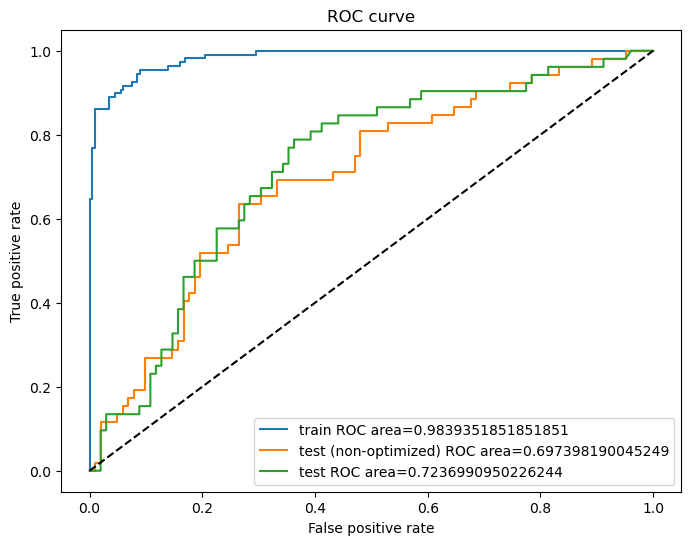

In [69]:
y_pred_gb_cv=GB_newfit_op.predict_proba(X_test)[:,1]
y_pred_gb=Gbfit.predict_proba(X_test)[:,1]

gb_fpr, gb_tpr, _ = roc_curve(y_train, GB_newfit_op.predict_proba(X_train)[:,1])
gbt_fpr, gbt_tpr, _ = roc_curve(y_test, y_pred_gb)
gb_fpr_t, gb_tpr_t, _ = roc_curve(y_test, y_pred_gb_cv)
plt.figure(figsize=(8, 6))
plt.plot(gb_fpr, gb_tpr, label='train ROC area='+str(roc_auc_score(y_train, GB_newfit_op.predict_proba(X_train)[:,1])))
plt.plot(gbt_fpr, gbt_tpr, label='test (non-optimized) ROC area='+str(roc_auc_score(y_test,y_pred_gb )))
plt.plot(gb_fpr_t, gb_tpr_t, label='test ROC area='+str(roc_auc_score(y_test,y_pred_gb_cv )))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Here, we see that the optimization also didn't changed a lot of thing in terms of ROC curve area but the underlying metrics did.

## 5.5 Stacking

As proposed in the exercice, we tried to implement a stacking model, with  decision tree and logistic regression as base estimators and logistic regression as the meta-model.

F1 Score: 0.59
Recall: 0.47
Precision: 0.80
Accuracy: 0.76


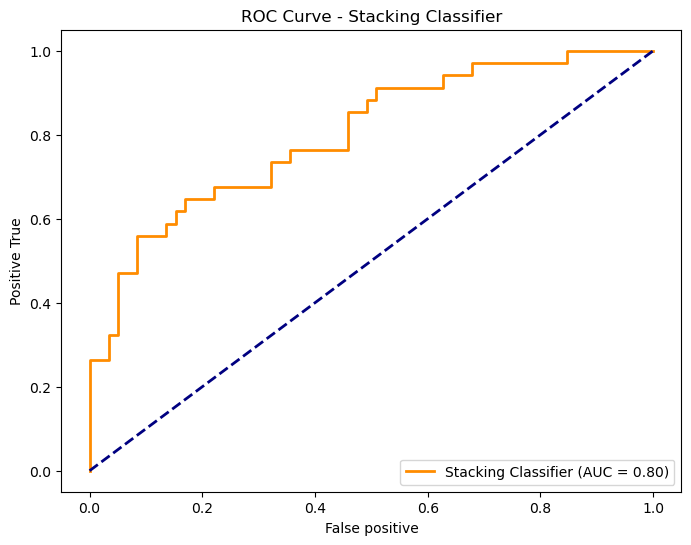

In [70]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

X_train_sta, X_test_sta, y_train_sta, y_test_sta = train_test_split(X, y, test_size=0.2, random_state=42)

lr_classifier = LogisticRegression(max_iter=1000,random_state=42)
tree_classifier = DecisionTreeClassifier(random_state=42)

stacking_model = StackingClassifier(
    estimators=[
        ('lr', lr_classifier),
        ('tree', tree_classifier)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    stack_method='auto',
    cv=5
)

stacking_model.fit(X_train_sta, y_train_sta)
y_pred_sta = stacking_model.predict(X_test_sta)

f1 = f1_score(y_test_sta, y_pred_sta)
recall = recall_score(y_test_sta, y_pred_sta)
precision = precision_score(y_test_sta, y_pred_sta)
accuracy = accuracy_score(y_test_sta, y_pred_sta)

print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")

y_pred_sta=stacking_model.predict_proba(X_test_sta)[:,1]

fpr_sta, tpr_sta, _ = roc_curve(y_test_sta, y_pred_sta)
roc_auc_sta = auc(fpr_sta, tpr_sta)

plt.figure(figsize=(8, 6))
plt.plot(fpr_sta, tpr_sta, color='darkorange', lw=2, label=f'Stacking Classifier (AUC = {roc_auc_sta:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive')
plt.ylabel('Positive True')
plt.title('ROC Curve - Stacking Classifier')
plt.legend(loc="lower right")
plt.show()


As expected, the stacking model is the best out of all models that we tested. Stacking generally involves different types of models which will make it less sensible to unbalanced distribution, and flaws of a single model. Here, all metrics have improved, which proves that It isn't only depending on the complexity and distribution of data.
We choose not to optimize parameters on the stacking model since It was taking too much time to find the optimized parameters.

Overall, we found that these three models could be better to predict data: while gradient boost hasn't worked efficiently due to the unbalance and the size of dataset, adaboost permitted to focalize on mistakes of decision trees models, which was very helpful to generalize the under-sized class and increased the generalization. Stacking has been another model that also performed, since it used different models to classify, and thus is more robust to unbalanced classes.

In [71]:
#Adaboost Performances Kfold

# KFold for Accuracy
kfold=KFold(n_splits=15, shuffle=True,random_state=0)
Accuracy21_kfold=cross_val_score(AB_new,X,y,cv=kfold,scoring='accuracy')


# KFold for Recall
kfold=KFold(n_splits=15, shuffle=True,random_state=0)
Recall21_kfold=cross_val_score(AB_new,X,y,cv=kfold,scoring='recall')


# KFold for Precision
kfold=KFold(n_splits=15, shuffle=True,random_state=0)
Precision21_kfold=cross_val_score(AB_new,X,y,cv=kfold,scoring='precision')


# KFold for F1-score
kfold=KFold(n_splits=15, shuffle=True,random_state=0)
F1_21_kfold=cross_val_score(AB_new,X,y,cv=kfold,scoring='f1')


print(f"Scores mean for accuracy K-Fold: {np.mean(Accuracy21_kfold)}")
print(f"Scores mean for Recall K-Fold: {np.mean(Recall21_kfold)}")
print(f"Scores mean for Precision K-Fold: {np.mean(Precision21_kfold)}")
print(f"Scores mean for F1 Scores K-Fold: {np.mean(F1_21_kfold)}")

Scores mean for accuracy K-Fold: 0.7296774193548388
Scores mean for Recall K-Fold: 0.44557442557442567
Scores mean for Precision K-Fold: 0.6277248677248676
Scores mean for F1 Scores K-Fold: 0.5097044431316877


In [73]:
# Gradient Boosting Performances Kfold

# KFold for Accuracy
kfold=KFold(n_splits=15, shuffle=True,random_state=0)
Accuracy22_kfold=cross_val_score(GB_new,X,y,cv=kfold,scoring='accuracy')


# KFold for Recall
kfold=KFold(n_splits=15, shuffle=True,random_state=0)
Recall22_kfold=cross_val_score(GB_new,X,y,cv=kfold,scoring='recall')


# KFold for Precision
kfold=KFold(n_splits=15, shuffle=True,random_state=0)
Precision22_kfold=cross_val_score(GB_new,X,y,cv=kfold,scoring='precision')


# KFold for F1-score
kfold=KFold(n_splits=15, shuffle=True,random_state=0)
F1_22_kfold=cross_val_score(GB_new,X,y,cv=kfold,scoring='f1')


print(f"Scores mean for accuracy K-Fold: {np.mean(Accuracy22_kfold)}")
print(f"Scores mean for Recall K-Fold: {np.mean(Recall22_kfold)}")
print(f"Scores mean for Precision K-Fold: {np.mean(Precision22_kfold)}")
print(f"Scores mean for F1 Scores K-Fold: {np.mean(F1_22_kfold)}")

Scores mean for accuracy K-Fold: 0.7100358422939068
Scores mean for Recall K-Fold: 0.44799099049099045
Scores mean for Precision K-Fold: 0.5944636844636846
Scores mean for F1 Scores K-Fold: 0.498963664623915


In [74]:
# Stacking Performances Kfold

# KFold for Accuracy
kfold=KFold(n_splits=15, shuffle=True,random_state=0)
Accuracy23_kfold=cross_val_score(stacking_model,X,y,cv=kfold,scoring='accuracy')


# KFold for Recall
kfold=KFold(n_splits=15, shuffle=True,random_state=0)
Recall23_kfold=cross_val_score(stacking_model,X,y,cv=kfold,scoring='recall')


# KFold for Precision
kfold=KFold(n_splits=15, shuffle=True,random_state=0)
Precision23_kfold=cross_val_score(stacking_model,X,y,cv=kfold,scoring='precision')


# KFold for F1-score
kfold=KFold(n_splits=15, shuffle=True,random_state=0)
F1_23_kfold=cross_val_score(stacking_model,X,y,cv=kfold,scoring='f1')


print(f"Scores mean for accuracy K-Fold: {np.mean(Accuracy23_kfold)}")
print(f"Scores mean for Recall K-Fold: {np.mean(Recall23_kfold)}")
print(f"Scores mean for Precision K-Fold: {np.mean(Precision23_kfold)}")
print(f"Scores mean for F1 Scores K-Fold: {np.mean(F1_23_kfold)}")

Scores mean for accuracy K-Fold: 0.7296057347670252
Scores mean for Recall K-Fold: 0.4458759758759758
Scores mean for Precision K-Fold: 0.6569191919191919
Scores mean for F1 Scores K-Fold: 0.5167168887757122


In [75]:
# Create a data frame for each performance from differents classification models

Accur1={'AB Accuracy':Accuracy21_kfold,'GB Accuracy':Accuracy22_kfold,'Stack Accuracy':Accuracy23_kfold,'RF Accuracy': Accuracy3_kfold }
df11 = pd.DataFrame(Accur1)

Recall1={'AB Recall':Recall21_kfold,'GB Recall':Recall22_kfold,'Stack Recall':Recall23_kfold,'RF Recall': Recall3_kfold}
df12 = pd.DataFrame(Recall1)

Precision1={'AB Precision':Precision21_kfold,'GB Precision':Precision22_kfold,'Stack Precision':Precision23_kfold,'RF Precision': Precision3_kfold}
df13 = pd.DataFrame(Precision1)

F1_score1={'AB F1_score':F1_21_kfold,'GB F1_score':F1_22_kfold,'Stack F1_score':F1_23_kfold,'RF F1_score': f13_kfold}
df14 = pd.DataFrame(F1_score1)

### Compare the classification models using the usual indicators (Accuracy, Precision, recall and F1-score) And ROC Curve

<Axes: >

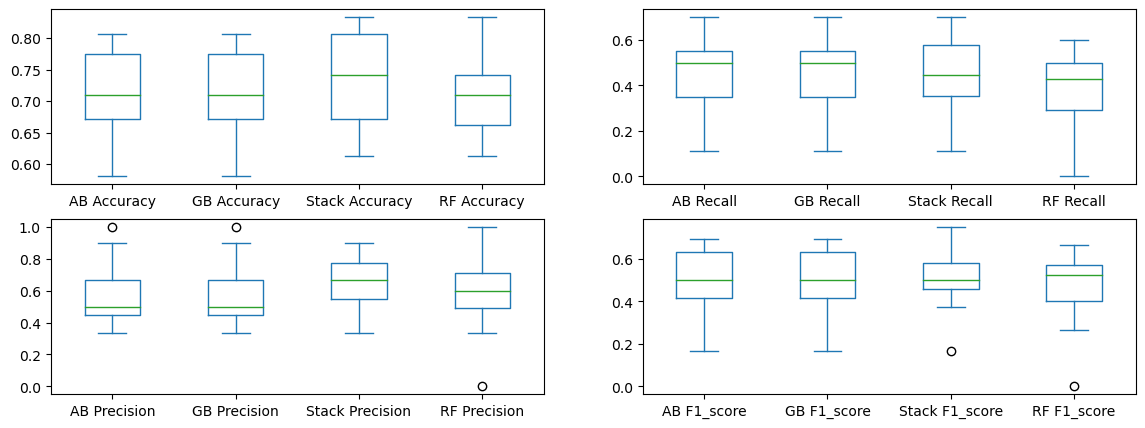

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(14, 5))
df11.plot(kind='box',ax=axes[0, 0])
df12.plot(kind='box',ax=axes[0, 1])
df13.plot(kind='box',ax=axes[1, 0])
df14.plot(kind='box',ax=axes[1, 1])

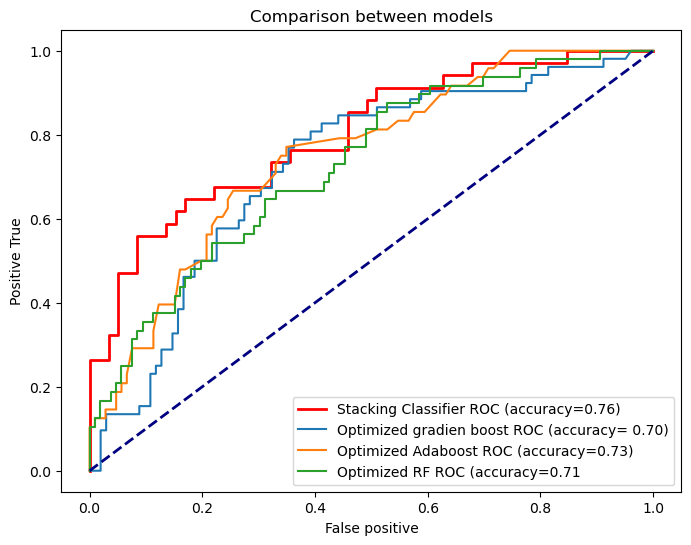

In [77]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_sta, tpr_sta, color='red', lw=2, label=f'Stacking Classifier ROC (accuracy=0.76)')
plt.plot(gb_fpr_t, gb_tpr_t, label='Optimized gradien boost ROC (accuracy= 0.70)')
plt.plot(train_fpr_t, test_tpr_t, label='Optimized Adaboost ROC (accuracy=0.73)')
plt.plot(test_fpr, test_tpr, label='Optimized RF ROC (accuracy=0.71')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive')
plt.ylabel('Positive True')
plt.title('Comparison between models')
plt.legend(loc="lower right")
plt.show()

While we observed that complex models compared to simple decision trees where better on average, we also found that one was particularly good: stacking with logistic regression and decision tree. Other models are good but suffer from their own nature in relation with data. However, stacking doesn't have this problem since it's using different models.

# 6 Conclusion

In this problem, we tried to classify medical data based on 9 indicators. We used data analysis to analyze the structure of data and found that the variables were difficulty able to discriminate between the presence of CHD or not.

We then tried to classify the data with decision tree but found that the model wasn't able to generalize and was overfitting. We hypothesized that the amount of data was not enough and too much unbalanced between the classes to deal to adjust a simple model like this rightly.

We then sticked to using a bagging method which would supposedly reduce this problem by averaging the trees on different subsets of the data but found that while increasing the performance, the unbalance remained present in the performance of the model. We assumed that it could be because the size of the clusters in the whole latent space were too small to learn.

To solve this, we used a random forest model that would allow us to see the clustering with a reduced number of features in a lot of decision trees. This increased the performance, presumably because the size of the clusters in a dimension-reduced space were bigger. The unbalance between the two classes in metrics remained present though and prevented us to use this classificator as reliable for this problem.

The data were definitely a problem to us because the number of examples/variables ratio was too low. This leads to a high number of clusters with a small number of points in each of them in the latent space, whose structure couldn't be learned by a model simply based on decision trees.

To counter this, we tried to evaluate Adaboost, gradient boost and stacking which we expected to be better since they are more able to deal with unbalanced distribution of data. This proved to be the best way to perform classification, even though we found that It was bounded to 0.76 in term of precision.

Adaboost and gradient boosting helped us to generalize on the under-sampled class which had a difficult time with previous models since it was too small with the recall improving on both models. This means that this class structure was betterly understood by the models.

We added a logistic regression on the decision tree to obtain a stacking and this was drastically improved its perfomance. We supposed that it was a consequence of the use of different models to prevent bias.

In conclusion, we first thought that this dataset was too small and unbalanced to obtain an efficient classification but finally find out that we could obtain a "good" one with the right model.